In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def read_data(csv_file):
  points = np.genfromtxt(csv_file, delimiter=",")
  X = points[:,0] # x points
  Y = points[:,1] # y points
  return X, Y

def initial_parameter(w0, w1):
  '''
  Initialize paramters for model to learn
  '''
  return w0, w1

def f(w0, w1, X):
  y = np.zeros(X.shape[0])
  for i in range(len(X)):
    y[i] = w0 + w1*X[i]
  return y

def calculate_error(y_pred, y):
  '''
  sum of squared errors
  '''
  errors = 0
  for i in range(0, len(y_pred)):
    difference = y_pred[i]-y[i] # for every point
    square = difference**2
    errors += square
  return errors/float(len(y_pred))

def update(X, Y, w0, w1, learning_rate):
  dw0 = 0 # derivate of error with respect to intercept
  dw1 = 0 # derivate of error with respect to slope
  N = float(len(X))
  Y_pred = np.zeros(Y.shape)
  for i in range(int(N)):
    Y_pred[i] = w0+w1*X[i]
  for i in range(0, int(N)):
    x = X[i] # x-point
    y = Y[i] # y-point
    y_pre = Y_pred[i]
    dw0 += -(2/N) * (y-y_pre) # update dE/dw0 gradient
    dw1 += -(2/N) * x * (y-y_pre) # update dE/dw1 gradient
  # update weights
  w0 = w0 - (learning_rate*dw0)
  w1 = w1 - (learning_rate*dw1)
  return w0, w1

In [0]:
# train
X, Y = read_data("data.csv")
w0, w1 = initial_parameter(0, 0)

In [4]:
X_train = X[:-20].reshape(80, 1)
X_test = X[-20:].reshape(20, 1)
print(X_train.shape, X_test.shape)

(80, 1) (20, 1)


In [5]:
y_train = Y[:-20]
y_test = Y[-20:]
print(y_train.shape, y_test.shape)

(80,) (20,)


In [6]:
y_pred = f(w0, w1, X_train)
error = calculate_error(y_pred, y_train)
print(error)

5374.779987075437


In [7]:
num_iterations = 100
learning_rate = 0.0001
for i in range(num_iterations):
  w0, w1 = update(X_train, y_train, w0, w1, learning_rate)
  y_pred = f(w0, w1, X_train)
  error = calculate_error(y_pred, y_train)
  print("Iteration: %d, error: %0.5f" % (i, error))

Iteration: 0, error: 1465.42908
Iteration: 1, error: 461.81644
Iteration: 2, error: 204.16796
Iteration: 3, error: 138.02416
Iteration: 4, error: 121.04365
Iteration: 5, error: 116.68439
Iteration: 6, error: 115.56526
Iteration: 7, error: 115.27795
Iteration: 8, error: 115.20419
Iteration: 9, error: 115.18524
Iteration: 10, error: 115.18037
Iteration: 11, error: 115.17911
Iteration: 12, error: 115.17878
Iteration: 13, error: 115.17869
Iteration: 14, error: 115.17865
Iteration: 15, error: 115.17864
Iteration: 16, error: 115.17862
Iteration: 17, error: 115.17861
Iteration: 18, error: 115.17860
Iteration: 19, error: 115.17859
Iteration: 20, error: 115.17858
Iteration: 21, error: 115.17857
Iteration: 22, error: 115.17856
Iteration: 23, error: 115.17855
Iteration: 24, error: 115.17853
Iteration: 25, error: 115.17852
Iteration: 26, error: 115.17851
Iteration: 27, error: 115.17850
Iteration: 28, error: 115.17849
Iteration: 29, error: 115.17848
Iteration: 30, error: 115.17847
Iteration: 31, er

In [8]:
print(w0, w1)

0.03219781286819278 [1.45989297]


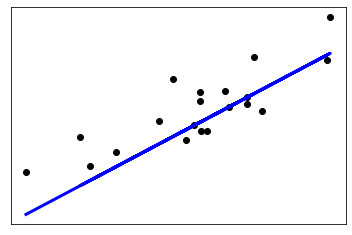

In [9]:
pred = f(w0, w1, X_test)
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show();

With linear regression:
===

Automatically created module for IPython interactive environment
Coefficients: 
 [1.36821478]
Mean squared error: 100.49
Coefficient of determination: 0.54


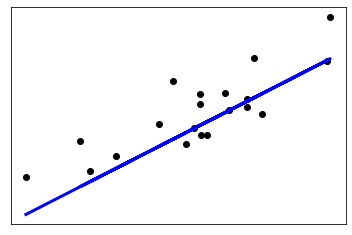

In [10]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
X, Y = read_data("data.csv")

# Split the data into training/testing sets
X_train = X[:-20].reshape(80, 1)
X_test = X[-20:].reshape(20, 1)

# Split the targets into training/testing sets
y_train = Y[:-20]
y_test = Y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()